In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
import pickle
FIGSIZE = (14, 8)

# About data

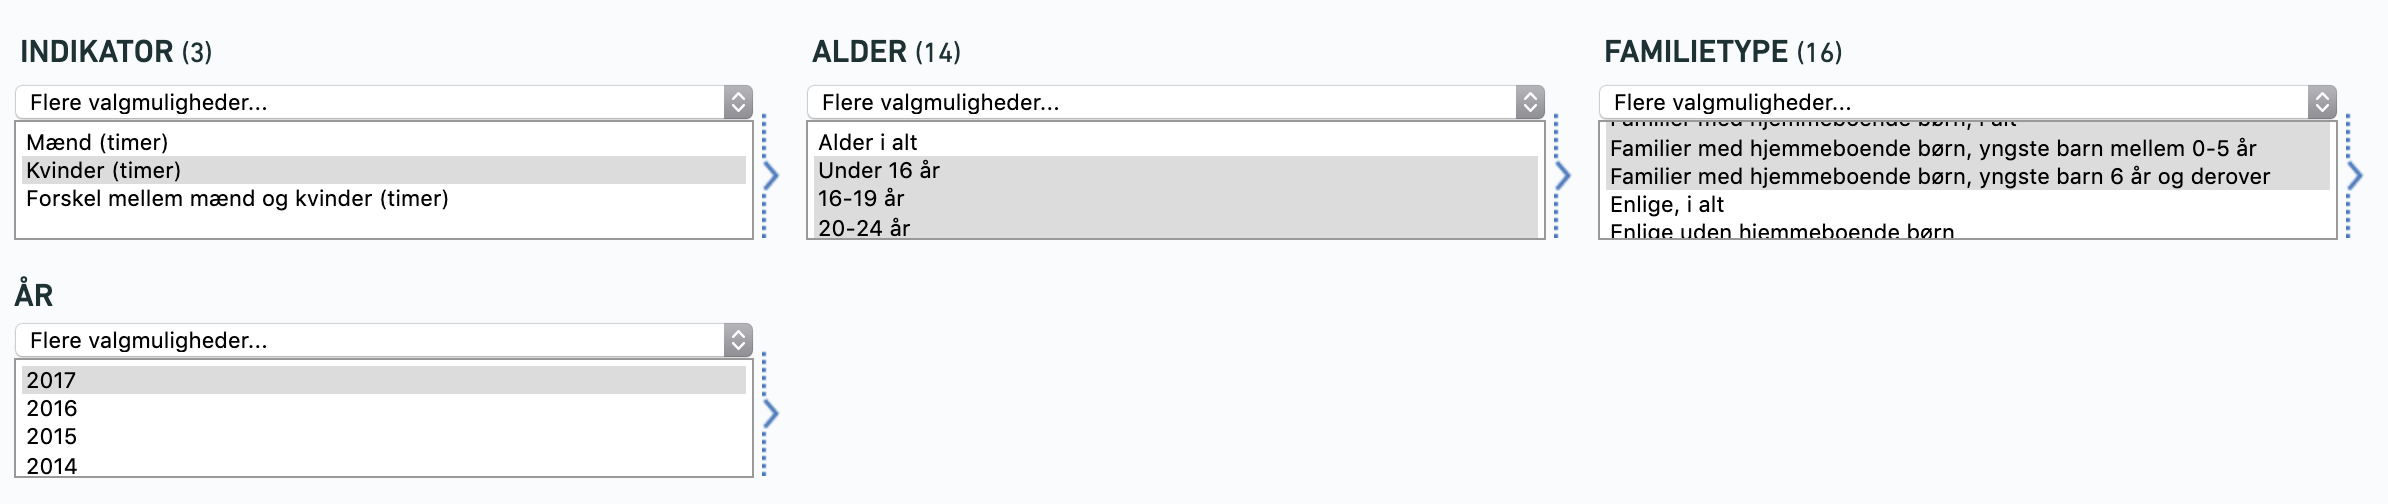

In [2]:
working_hours_women_raw = pd.read_csv('..//data//LIGEF15_women.csv', encoding='latin-1',sep=';', header=None)
working_hours_men_raw = pd.read_csv('..//data//LIGEF15_men.csv', encoding='latin-1',sep=';', header=None)
columns = [
    "age_group_raw",
    "I alt", 
    "Familier uden hjemmeboende børn, i alt",
    "Familier med hjemmeboende børn, i alt",
    "Familier med hjemmeboende børn, yngste barn mellem 0-5 år",
    "Familier med hjemmeboende børn, yngste barn 6 år og derover"
]
 

In [3]:
working_hours_women_raw.drop([0, 1],axis=1,inplace=True)
working_hours_men_raw.drop([0, 1],axis=1,inplace=True)

In [4]:
working_hours_women_raw.columns = columns
working_hours_men_raw.columns = columns

In [5]:
def clean_age_group(x):
    res = x.split(' ')
    if len(res) > 2:
        if res[0]=='Under':
            return '< ' + res[1]
        else:
            return str(int(res[0]) - 1) + ' <'
    else:
        return res[0]

working_hours_women_raw['age_group'] = working_hours_women_raw['age_group_raw'].apply(clean_age_group)
working_hours_men_raw['age_group'] = working_hours_men_raw['age_group_raw'].apply(clean_age_group)


In [6]:
working_hours_women_raw

,age_group_raw,I alt,"Familier uden hjemmeboende børn, i alt","Familier med hjemmeboende børn, i alt","Familier med hjemmeboende børn, yngste barn mellem 0-5 år","Familier med hjemmeboende børn, yngste barn 6 år og derover",age_group
0,Under 16 år,4.6,3.5,4.6,4.4,4.6,< 16
1,16-19 år,11.6,17.5,10.9,10.4,10.9,16-19
2,20-24 år,21.5,20.1,25.5,29.7,24.8,20-24
3,25-29 år,30.7,29.7,33.2,33.3,30.9,25-29
4,30-34 år,34.1,33.7,34.3,34.6,32.8,30-34
5,35-39 år,34.0,33.6,34.1,34.3,33.7,35-39
6,40-44 år,33.9,33.1,34.1,33.9,34.1,40-44
7,45-49 år,34.1,33.4,34.3,33.7,34.4,45-49
8,50-54 år,34.1,33.8,34.4,34.3,34.4,50-54
9,55-59 år,33.5,33.3,34.0,34.0,34.0,55-59


In [7]:
rel_cols = [
    "I alt", 
    "Familier uden hjemmeboende børn, i alt",
    "Familier med hjemmeboende børn, i alt",
    "Familier med hjemmeboende børn, yngste barn mellem 0-5 år",
    "Familier med hjemmeboende børn, yngste barn 6 år og derover"
]

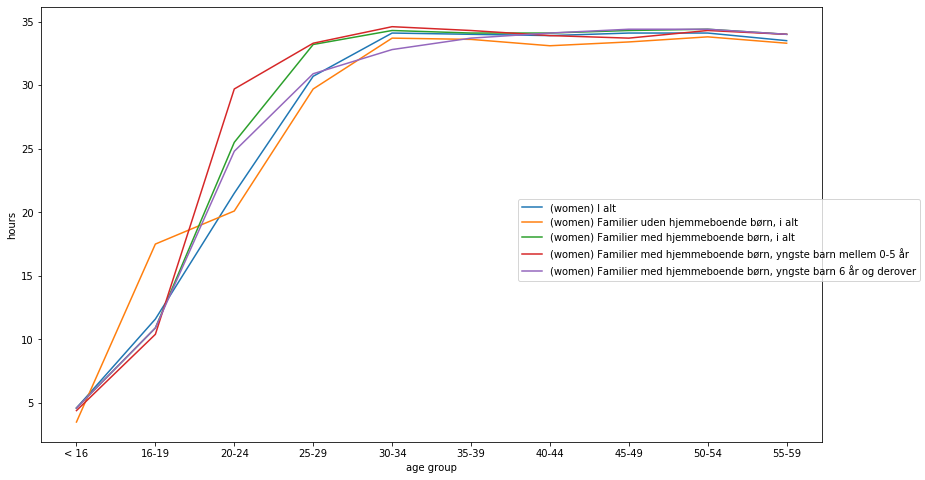

In [8]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
x_axis = working_hours_women_raw.iloc[0:10]['age_group']

for col in rel_cols:
    s = working_hours_women_raw.iloc[0:10][col]
    ax.plot(x_axis, s, label = '(women) ' + col)

ax.set_xlabel('age group')
ax.set_ylabel('hours')

f.legend(loc='right')

f.savefig('..//figures//women_hours_empirical.png')

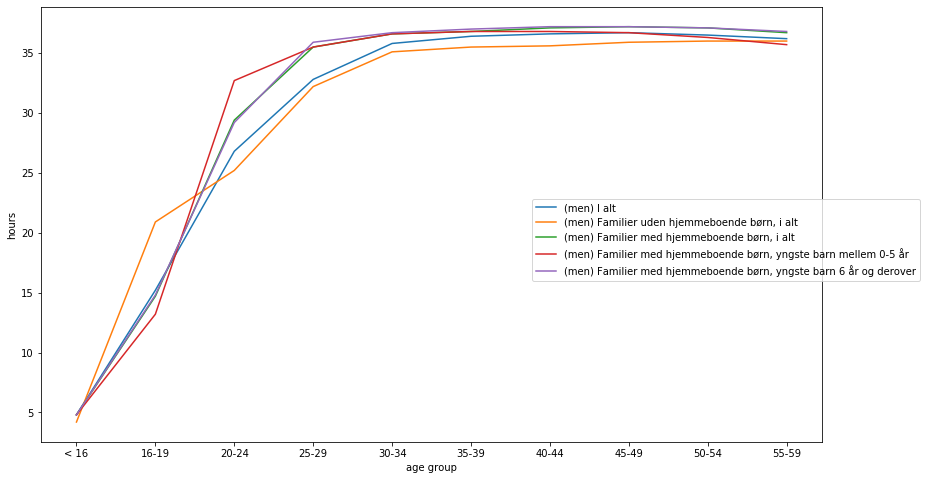

In [9]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
x_axis = working_hours_men_raw.iloc[0:10]['age_group']

for col in rel_cols:
    s = working_hours_men_raw.iloc[0:10][col]
    ax.plot(x_axis, s, label = '(men) '+ col)
    
ax.set_xlabel('age group')
ax.set_ylabel('hours')

f.legend(loc='right')

f.savefig('..//figures//men_hours_empirical.png')

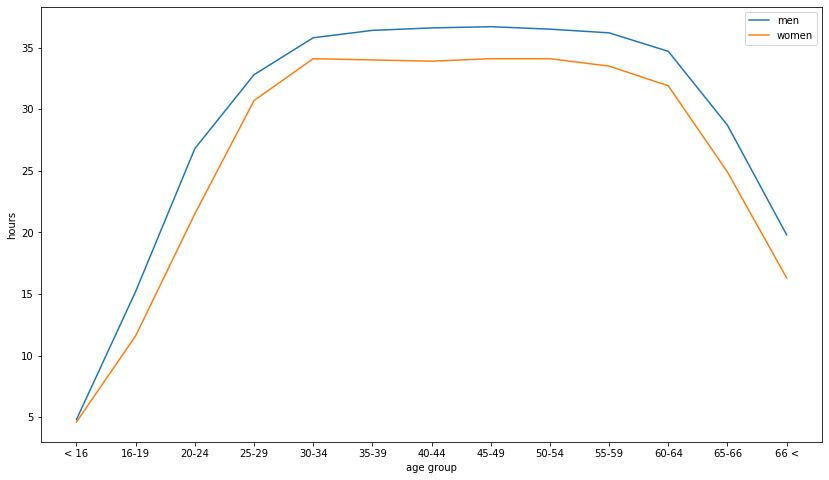

In [10]:
#comparing women and men:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
x_axis = working_hours_men_raw['age_group']
ax.plot(x_axis, working_hours_men_raw['I alt'], label='men')
ax.plot(x_axis, working_hours_women_raw['I alt'], label='women')
ax.legend()

ax.set_xlabel('age group')
ax.set_ylabel('hours')

f.savefig('..//figures//men_vs_women_hours_empirical.png')

In [11]:
men_hours = list(working_hours_men_raw['I alt'])
women_hours = list(working_hours_women_raw['I alt'])
ages = [16, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 65, 70]

In [12]:
men_hours

[4.8, 15.2, 26.8, 32.8, 35.8, 36.4, 36.6, 36.7, 36.5, 36.2, 34.7, 28.7, 19.8]

In [13]:
def get_interpolation(true_ages, hours):
    
    
    f = interp1d(true_ages, hours, kind='linear', fill_value = 'extrapolate')
    

    
    ages = list(range(90))
    wages = f(ages)
    
    for ix in range(wages.size):
        if wages[ix] < 0.0:
            wages[ix] = 0.0
        
    return np.array(wages)    

In [14]:
interp_men_hours = get_interpolation(ages, men_hours)

In [15]:
interp_women_hours = get_interpolation(ages, women_hours)

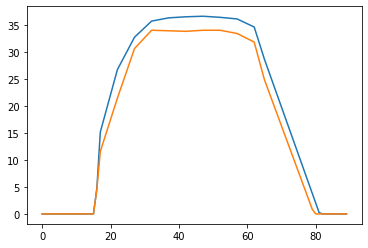

In [16]:
plt.plot(interp_men_hours)
plt.plot(interp_women_hours)

In [17]:
with open('..//data//men_hours_empirical', 'wb') as f:
    pickle.dump(interp_men_hours, f)

In [18]:
with open('..//data//women_hours_empirical', 'wb') as f:
    pickle.dump(interp_women_hours, f)